<h1><center>DS 300: PE 3 - Ensemble Learning and Random Forests</center></h1>

![Cartoon](https://www.analyticsindiamag.com/wp-content/uploads/2014/02/Random-Forest.png)

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setup

#### Generate a synthetic dataset that contains two interleaving half circles. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

<AxesSubplot:>

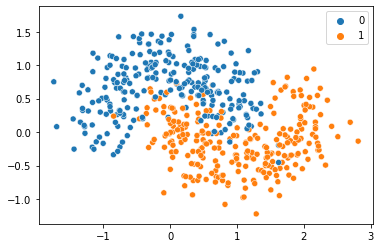

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

## Part I: Bagging ensemble learning

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Question 1:

#### Create a decision tree classifer object with random seed being 101. Then evaluate the accuracy score.

In [7]:
tree_clf = DecisionTreeClassifier(random_state=101)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)
print(accuracy_score(y_test, pred))




0.88


## Question 2:

#### Create a bagging classifier object with decision tree classifiers as the base "weak learners". Use 500 weak learners and draw 80% data samples with replacement for each bootstrap dataset. Use random state as 101 when needed.

In [28]:
bag_clf = BaggingClassifier(
                           base_estimator=DecisionTreeClassifier(random_state=101),
                           n_estimators=500,
                           max_samples=0.8,
                           max_features=1.0,
                           bootstrap=True,
                           n_jobs=2,
                           random_state=101)

bag_clf.fit(X_train, y_train)

bag_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, bag_pred))

0.89


## Question 3:
#### Plot the decision boundary for both models with the given function.

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

#### Plot the graphs

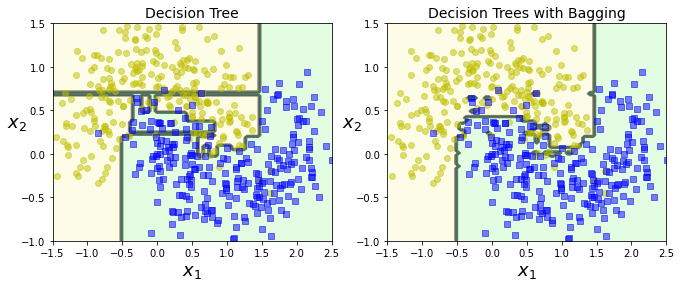

In [29]:
plt.figure(figsize=(11,4))

plt.subplot(121)
# Plot for decision tree
plot_decision_boundary(tree_clf, X, y)

plt.title("Decision Tree", fontsize=14)

plt.subplot(122)
# Plot for bagging
plot_decision_boundary(bag_clf, X, y)

plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

## Part II: Random Forests

## Question 4:
#### Create a bagging classifier object with decision tree classifiers as the base "weak learners". Use 500 weak learners and draw 100% data samples with replacement for each bootstrap dataset. Make sure to use random state 101, max_depth 5 and criterion 'entropy'.

In [20]:
bag_clf_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=101),
                           n_estimators=500,
                           max_samples=1.0,
                           bootstrap=True,
                           n_jobs=2,
                           random_state=101)
bag_clf_2.fit(X_train, y_train)
bag_pred_2 = bag_clf_2.predict(X_test)
print(accuracy_score(y_test, bag_pred_2))


0.89


## Question 5:
#### Create a random forest classifer object with 500 base classifers. Make sure to use random state 101, max_depth 5 and criterion 'entropy'.

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500,
                               random_state=101,
                               max_depth=5,
                               criterion='entropy')

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))



0.9


## Question 6:

#### Use the IRIS dataset to try on the random forest classifier and show the importance of the features

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

In [23]:
X_iris[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [24]:
y_iris[:5]

array([0, 0, 0, 0, 0])

In [32]:
# Train the model
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500, random_state=101)
rf_clf.fit(X_iris, y_iris)


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=101)

In [35]:
# Find the importance score for each feature
for (name, score) in zip(iris['feature_names'], rf_clf.feature_importances_):
    print(name, score)
    



sepal length (cm) 0.09755685299218779
sepal width (cm) 0.019305455038447307
petal length (cm) 0.413784023798595
petal width (cm) 0.46935366817076996


## Part III: AdaBoost
## Question 7:
#### Create an AdaBoost classifier object with decision tree "stump"s (depth = 1) as the base learners. Make sure to use 200 stumps, random state 101, and learning rate 0.5.

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=101),
    n_estimators=200,
    learning_rate=0.5,
    algorithm='SAMME.R',
    random_state=101
)

ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, ada_pred))




0.92


#### Plot the decision boundary for the adaboost classifier.

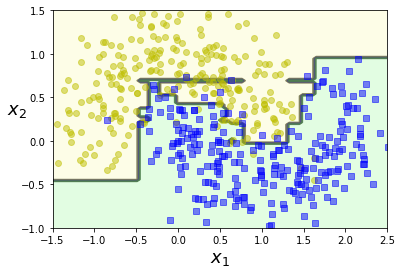

In [40]:
plot_decision_boundary(ada_clf, X, y)



## Question 8: Voting Classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

[Reference: click me](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

nb_clf = GaussianNB()

rf_clf = RandomForestClassifier(n_estimators=500, random_state=101)

svm_clf = SVC(kernel='rbf', gamma='auto', random_state=101)

voting_clf = VotingClassifier(estimators=[('nb', nb_clf), ('rf', rf_clf), ('svc', svm_clf)], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=101)),
                             ('svc', SVC(gamma='auto', random_state=101))])

In [44]:
# Find the corresponding accuracy with a for loop

for clf in (nb_clf, rf_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))
    
    

GaussianNB 0.81
RandomForestClassifier 0.89
SVC 0.89
VotingClassifier 0.89


## Question 9: Now try to use 'soft' voting on the voting classifer with Naive Bayes, Random Forest, and AdaBoost.

In [20]:
nb_clf = 

rf_clf = 

ada_clf = 

voting_clf = 


# Train the voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=101)),
                             ('ada',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                 learning_rate=0.5,
                                                 n_estimators=200,
                                                 random_state=101))],
                 voting='soft')

In [21]:
# Print the corresponding accuracy in a for loop

for clf in (nb_clf, rf_clf, ada_clf, voting_clf):
    pass
    
    

GaussianNB 0.81
RandomForestClassifier 0.89
AdaBoostClassifier 0.92
VotingClassifier 0.9


## Question 10: Re-train the AdaBoost classifier with GridSearch.

#### Use `GridSearchCV()` to train the AdaBoost classifier. Study `n_estimators` as [100, 200, ..., 500] (all inclusive), and `learning_rate` as [0.1, 0.3 0.5, 0.7, 0.9]. Use 5-fold cross-validation to train the GridSearchCV classifier. 

In [47]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : np.arange(100,501,100),
    'learning_rate' : np.arange(1,10,2)/10
}

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=101)

clf = GridSearchCV(ada_clf, parameters, cv=5, verbose=2, refit=True, n_jobs=4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=101),
             n_jobs=4,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             verbose=2)

In [48]:
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Score: 0.93


In [50]:
pred = clf.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
# Accuracy
print(accuracy_score(y_test, clf.predict(y_test)))

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.